In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline #Arka arkaya iki modeli çalıştırmaya yarıyor

In [4]:
df=pd.read_csv("3-customersatisfaction.csv")

In [5]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [6]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


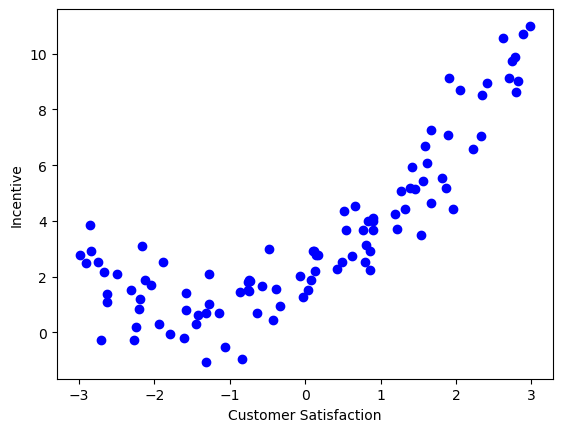

In [8]:
plt.scatter(df["Customer Satisfaction"],df["Incentive"],color="b")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.show()

In [9]:
#independent and dependent
X=df[["Customer Satisfaction"]]
y=df["Incentive"]

In [10]:
#train -test 

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [12]:
#Standartization

In [13]:
scaler=StandardScaler()

In [14]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [15]:
#Regression 

In [16]:
regression=LinearRegression()

In [17]:
regression.fit(X_train,y_train)

LinearRegression()

In [18]:
#prediction

In [19]:
y_pred=regression.predict(X_test)

In [20]:
y_pred

array([ 4.65663741,  3.71913877,  1.64121789,  6.29646523,  3.46766736,
        5.7580845 ,  4.692485  ,  3.61616231,  5.62448003,  0.13472702,
        4.47909659,  4.8130839 ,  1.58319087,  0.30515983,  5.27634309,
        0.41711005, -0.7385295 , -0.32653914,  3.55906887,  1.19798631])

In [21]:
r2score=r2_score(y_test,y_pred)
print(r2score)

0.2705652535622243


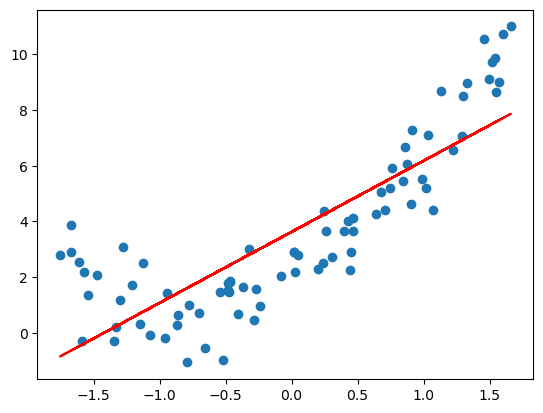

In [22]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),"r")
plt.show()

In [23]:
#poly

In [24]:
poly=PolynomialFeatures(degree=2,include_bias=True)

In [25]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [26]:
X_train_poly

array([[ 1.00000000e+00,  2.47633535e-01,  6.13223675e-02],
       [ 1.00000000e+00,  1.45565669e+00,  2.11893639e+00],
       [ 1.00000000e+00, -5.40182671e-01,  2.91797318e-01],
       [ 1.00000000e+00, -7.00039198e-01,  4.90054879e-01],
       [ 1.00000000e+00,  1.56862116e+00,  2.46057233e+00],
       [ 1.00000000e+00,  9.87568378e-01,  9.75291302e-01],
       [ 1.00000000e+00,  4.48640749e-01,  2.01278522e-01],
       [ 1.00000000e+00,  1.54377517e+00,  2.38324178e+00],
       [ 1.00000000e+00,  1.33219938e+00,  1.77475518e+00],
       [ 1.00000000e+00, -4.80410926e-01,  2.30794658e-01],
       [ 1.00000000e+00,  3.92892957e-01,  1.54364876e-01],
       [ 1.00000000e+00, -6.57456685e-01,  4.32249293e-01],
       [ 1.00000000e+00,  4.42663768e-01,  1.95951211e-01],
       [ 1.00000000e+00, -8.72131603e-01,  7.60613533e-01],
       [ 1.00000000e+00, -1.57257044e+00,  2.47297780e+00],
       [ 1.00000000e+00, -4.70184630e-01,  2.21073587e-01],
       [ 1.00000000e+00, -8.36083500e-02

In [27]:
regression=LinearRegression()
regression.fit(X_train_poly,y_train)

LinearRegression()

In [28]:
y_pred_poly=regression.predict(X_test_poly)

In [29]:
r2PolyScore=r2_score(y_test,y_pred_poly)
print(r2PolyScore)

0.7685687698788558


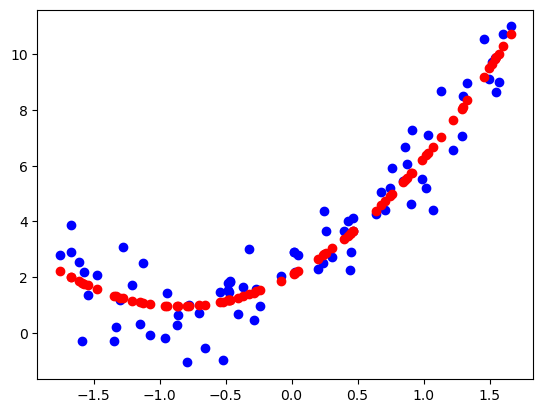

In [30]:
plt.scatter(X_train,y_train,color="b")
plt.scatter(X_train,regression.predict(X_train_poly),color="r")
plt.show()

In [31]:
poly=PolynomialFeatures(degree=3,include_bias=True)

In [32]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [33]:
regression=LinearRegression()
regression.fit(X_train_poly,y_train)

LinearRegression()

In [34]:
y_pred_poly=regression.predict(X_test_poly)

In [35]:
r2Score=r2_score(y_test,y_pred_poly)
print(r2Score)

0.7573443621401051


In [36]:
#new data

In [37]:
new_df=pd.read_csv("3-newdatas.csv")

In [38]:
new_df.head(3)

,0
0,-3.000000
1,-2.969849
2,-2.939698


In [39]:
new_df.rename(columns={"0":"Customer Satisfaction"},inplace=True)

In [40]:
new_df.head()

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


In [41]:
new_df=scaler.fit_transform(new_df)

In [42]:
new_df_poly=poly.transform(new_df)

In [43]:
new_df_poly

array([[ 1.00000000e+00, -1.72341210e+00,  2.97014925e+00,
        -5.11879115e+00],
       [ 1.00000000e+00, -1.70609137e+00,  2.91074777e+00,
        -4.96600165e+00],
       [ 1.00000000e+00, -1.68877065e+00,  2.85194630e+00,
        -4.81628320e+00],
       [ 1.00000000e+00, -1.67144992e+00,  2.79374484e+00,
        -4.66960460e+00],
       [ 1.00000000e+00, -1.65412920e+00,  2.73614340e+00,
        -4.52593469e+00],
       [ 1.00000000e+00, -1.63680847e+00,  2.67914198e+00,
        -4.38524229e+00],
       [ 1.00000000e+00, -1.61948775e+00,  2.62274057e+00,
        -4.24749622e+00],
       [ 1.00000000e+00, -1.60216702e+00,  2.56693917e+00,
        -4.11266530e+00],
       [ 1.00000000e+00, -1.58484630e+00,  2.51173779e+00,
        -3.98071835e+00],
       [ 1.00000000e+00, -1.56752558e+00,  2.45713643e+00,
        -3.85162419e+00],
       [ 1.00000000e+00, -1.55020485e+00,  2.40313508e+00,
        -3.72535165e+00],
       [ 1.00000000e+00, -1.53288413e+00,  2.34973374e+00,
      

In [44]:
y_predic_new_data=regression.predict(new_df_poly)

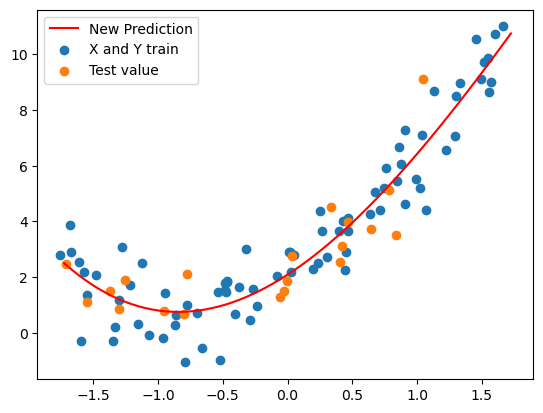

In [45]:
plt.plot(new_df,y_predic_new_data,"r",label="New Prediction")
plt.scatter(X_train,y_train,label="X and Y train")
plt.scatter(X_test,y_test,label="Test value")
plt.legend()
plt.show()

In [46]:
#PIPLINE

In [58]:
def poly_regression(degree):
    scaler=StandardScaler()
    regression=LinearRegression()
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    pipline=Pipeline([
        ("standart_scaler",scaler),
        ("poly_features",poly_features),
        ("regression",regression)
    ])
    pipline.fit(X_train,y_train)
    score=pipline.score(X_test,y_test)
    print("",score)
    
    
    

In [59]:
for degree in [1,2,3,4,5,6,7,8,9,10]:
    poly_regression(degree)

 0.27056525356222416
 0.7685687698788558
 0.7573443621401051
 0.7355034443260418
 0.7351244165095403
 0.7343590482133427
 0.7347819263549453
 0.7411422099998388
 0.7310763879815905
 0.7280578621232858
